In [0]:
import pandas as pd
spam = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [10]:
import pandas as pd
email = pd.read_csv('/content/emails.csv',quoting=3, error_bad_lines=False, encoding='latin-1')#encoding='utf-8')

b'Skipping line 8: expected 6 fields, saw 74\nSkipping line 12: expected 6 fields, saw 12\nSkipping line 14: expected 6 fields, saw 8\nSkipping line 15: expected 6 fields, saw 59\nSkipping line 16: expected 6 fields, saw 7\nSkipping line 17: expected 6 fields, saw 8\nSkipping line 19: expected 6 fields, saw 9\nSkipping line 21: expected 6 fields, saw 16\nSkipping line 23: expected 6 fields, saw 10\nSkipping line 33: expected 6 fields, saw 20\nSkipping line 35: expected 6 fields, saw 9\nSkipping line 41: expected 6 fields, saw 8\nSkipping line 44: expected 6 fields, saw 74\nSkipping line 47: expected 6 fields, saw 10\nSkipping line 49: expected 6 fields, saw 7\nSkipping line 51: expected 6 fields, saw 140\nSkipping line 52: expected 6 fields, saw 7\nSkipping line 53: expected 6 fields, saw 74\nSkipping line 57: expected 6 fields, saw 14\nSkipping line 58: expected 6 fields, saw 9\nSkipping line 62: expected 6 fields, saw 37\nSkipping line 63: expected 6 fields, saw 47\nSkipping line 66:

In [19]:
spam.shape

(5572, 5)

In [20]:
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [21]:
spam.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
282,ham,Ok. I asked for money how far,NaN,NaN,NaN
4850,ham,Gain the rights of a wife.dont demand it.i am ...,NaN,NaN,NaN
3389,spam,Please CALL 08712402972 immediately as there i...,NaN,NaN,NaN
1333,ham,"Oh... Icic... K lor, den meet other day...",NaN,NaN,NaN
3388,ham,O. Guess they both got screwd,NaN,NaN,NaN


In [0]:
spam = spam.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [23]:
spam.columns = ["label", "text"]
spam.sample(5)

,label,text
55,ham,Do you know what Mallika Sherawat did yesterda...
4515,spam,Congrats! 2 mobile 3G Videophones R yours. cal...
3337,ham,"K, if u bored up just come to my home.."
3502,ham,Free any day but i finish at 6 on mon n thurs...
5214,spam,Natalja (25/F) is inviting you to be her frien...


In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import string, collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib  inline

In [24]:
spam['text'].isnull().sum()

0

In [0]:
spam['label'] = spam['label'].map({'spam':1,'ham':0})

In [0]:
spam1 = spam[spam['label']==1]

In [0]:
spam1['text']=spam1['text'].str.lower()

In [0]:
all_spam = spam1['text'].str.split(' ')

In [0]:
!pip install -q matplotlib-venn

In [41]:
!apt-get -qq install -y libfluidsynth1

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 144439 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [42]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorflow-estimator, six, protobuf, grpcio, wrapt, absl-py, gast, scipy, h5py, google-pasta, keras-preprocessing, numpy, opt-einsum, tensorboard, astunparse, wheel, termcolor
Required-by: fancyimpute
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)
     |████████████████████████████████| 35.0MB 120kB/s 
     |████████████████████████████████| 890kB 49.9MB/s 
     |████████████████████████████████| 245kB 49.1MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=f9b6627bacbb500360f48a1ca7316561409ab8e9e64473cb8345c941a9dd2c5a
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c83

In [0]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
import libarchive

In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

In [44]:
#from string import strip
all_spam_cleaned=[]
for text in all_spam:
  text = [x.strip(string.punctuation) for x in text]
  all_spam_cleaned.append(text)

all_spam_cleaned[0]

['free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)t&c's",
 'apply',
 "08452810075over18's"]

In [45]:
text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)
final_text_spam[:500]

"free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's freemsg hey there darling it's been 3 week's now and no word back i'd like some fun you up for it still tb ok xxx std chgs to send å£1.50 to rcv winner as a valued network customer you have been selected to receivea å£900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only had your mobile 11 months or more u r entitled "

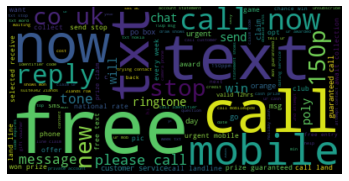

In [46]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(final_text_spam)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

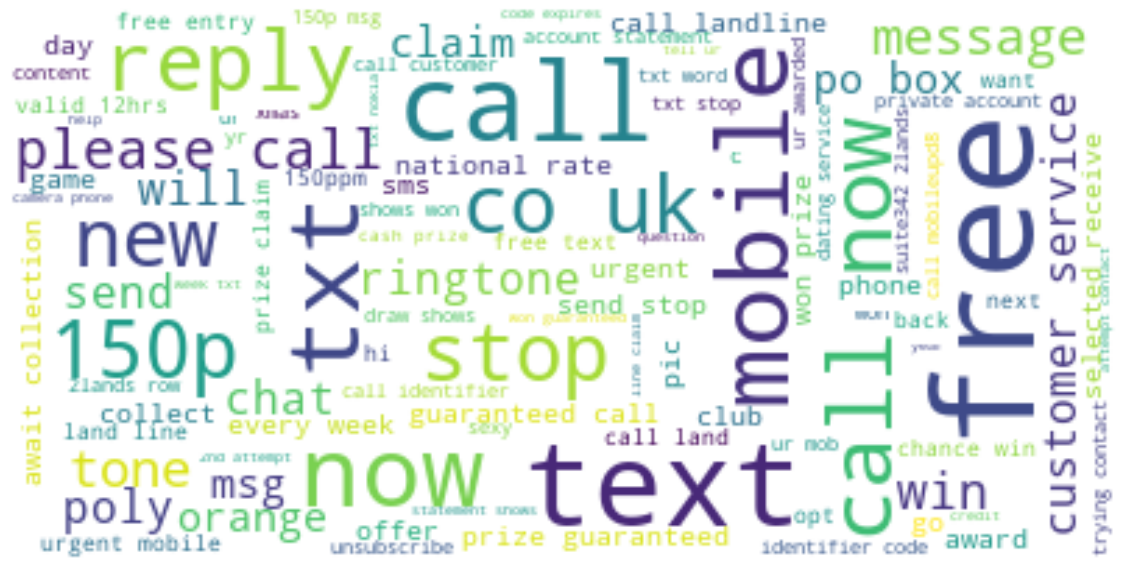

In [53]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(final_text_spam)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [52]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

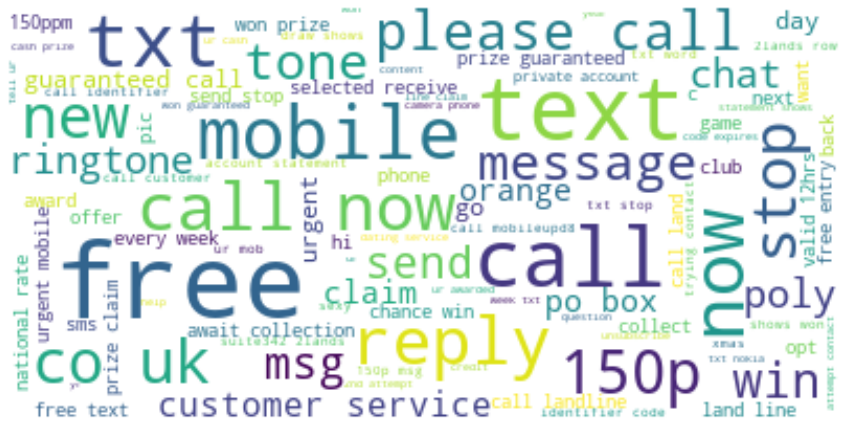

In [54]:
stopwords = set(STOPWORDS)
stopwords.update(["subject","re","vince","kaminski","enron","cc", "will", "s", "1","e","t"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color="white").generate(final_text_spam)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [58]:
#extracting the most frequent thirty words
filtered_words_spam = [word for word in final_text_spam.split() if word not in stopwords]
counted_words_spam = collections.Counter(filtered_words_spam)
word_count_spam = {}
for letter, count in counted_words_spam.most_common(50):
  word_count_spam[letter] = count
for i,j in word_count_spam.items():
  print("word:{0}, count:{1}".format(i,j))

word:call, count:346
word:free, count:216
word:now, count:189
word:2, count:173
word:txt, count:150
word:u, count:147
word:ur, count:144
word:mobile, count:123
word:text, count:120
word:4, count:119
word:claim, count:113
word:stop, count:113
word:reply, count:101
word:prize, count:92
word:won, count:73
word:new, count:69
word:send, count:67
word:nokia, count:65
word:urgent, count:63
word:cash, count:62
word:win, count:60
word:contact, count:56
word:service, count:55
word:please, count:52
word:guaranteed, count:50
word:customer, count:49
word:16, count:49
word:week, count:49
word:tone, count:48
word:per, count:46
word:phone, count:45
word:18, count:43
word:chat, count:42
word:awarded, count:38
word:draw, count:38
word:latest, count:36
word:å£1000, count:35
word:line, count:35
word:150ppm, count:34
word:mins, count:34
word:receive, count:33
word:camera, count:33
word:every, count:33
word:message, count:32
word:holiday, count:32
word:landline, count:32
word:shows, count:31
word:go, count: